<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
import os
import matplotlib.pyplot as plt
from _paths import nomeroff_net_dir

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip


2023-04-21 10:30:44,566 [2625972] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib64/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

2023-04-21 10:30:44,570 [2625972] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib64/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)

2023-04-21 10:30:44,571 [2625972] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib64/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

2023-04-21 10:30:44,573 [2625972] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib64/python3.8/site-packages/numpy/c

In [2]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading", image_loader="opencv")

2023-04-21 10:30:50,091 [2625972] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib64/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(

2023-04-21 10:30:50,092 [2625972] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib64/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



Downloaded model path: https://nomeroff.net.ua/models/ocr/ua/torch/model_v3.3/resnet18/anpr_ocr_eu_2004_2015_512_2023_04_19_resnet18.ckpt /mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/tools/../../data/./models/TextDetector/eu_ua_2004_2015/anpr_ocr_eu_2004_2015_512_2023_04_19_resnet18.ckpt


anpr_ocr_eu_2004_2015_512_2023_04_19_resnet18.ckpt: 13.9MB [00:01, 12.4MB/s]                            
2023-04-21 10:30:55,566 [2625972] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib64/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



In [3]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example1.jpeg'),
    #os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example2.jpeg'),
])

2023-04-21 10:31:08,540 [2625972] WARNING  py.warnings:109: [JupyterRequire] /mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:136: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(x1)

2023-04-21 10:31:08,541 [2625972] WARNING  py.warnings:109: [JupyterRequire] /mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:137: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(x2)

2023-04-21 10:31:08,584 [2625972] WARNING  py.warnings:109: [JupyterRequire] /mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/pipes/number_plate_text_readers/base/ocr.py:242: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider convertin

In [4]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['B392HX55']


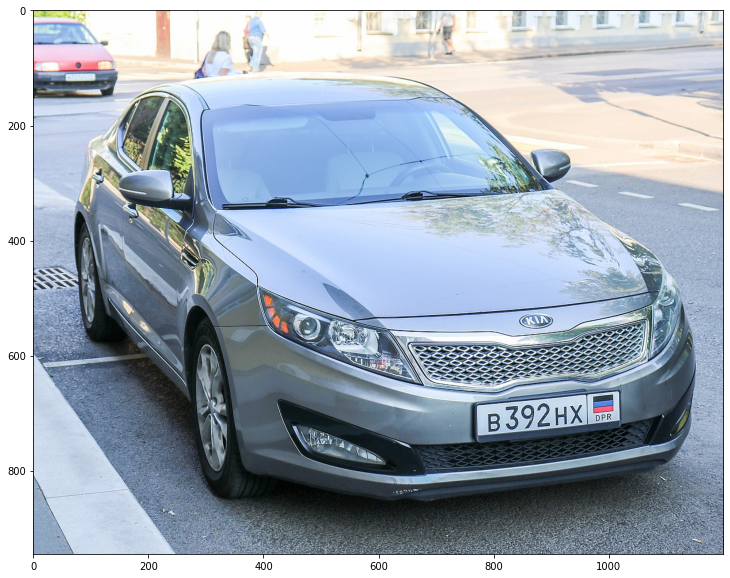

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, np in zip(images, texts):
    print(np)
    plt.imshow(img)
    plt.show()